# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Valentino Wahyu Pratama]
- **Email:** [valentinowahyu05@gmail.com]
- **ID Dicoding:** [valentino_wahyu]

## Menentukan Pertanyaan Bisnis

- Bagaimana cuaca dapat mempengaruhi jumlah peminjaman sepeda?
- Kapan waktu yang paling banyak diminati untuk meminjam sepeda? Apakah hari kerja atau hari libur?

## Import Semua Packages/Library yang Digunakan

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [29]:
day_data = pd.read_csv('/content/day.csv')
hour_data = pd.read_csv('/content/hour.csv')
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [30]:
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Baris kode ini menampilkan 5 baris pertama dari dataframe day_data dan hour_data
- Menampilkan variabel instant, dtday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, dan cnt

### Assessing Data

In [31]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [32]:
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [33]:
day_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [34]:
hour_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [35]:
# Memeriksa baris duplikat
print(day_data.duplicated().sum())
print(hour_data.duplicated().sum())


0
0


**Insight:**
- Berdasarkan metode info() yang dijalankan terdapat tipe data yang lebih baik diubah ke tipe data yang lebih sesuai seperti data tanggal (dteday) dari tipe data object akan diubah ke tipe data datetime ,
- Ketika menjalankan metode describe() untuk melihat parameter statistik data terdapat sedikit kejanggalan pada kolom data humidity, windspeed, dan atemp karena jarang sekali ditemukan nilai kelembapan udara, kecepatan angin, dan suhu dirasakan bernilai 0 di situasi nyata. Nilai dari parameter temp	atemp	hum	windspeed	juga kurang merepresentasikan nilai sebenarnya. Selain itu nilai season, year, dan workingday akan diubah juga supaya ditampilkan lebih gamblang
- Selain itu data sudah cukup baik karena tidak ada missing value dan duplicate data

### Cleaning Data

Mengubah tipe data dteday pada day.csv dan hour.csv dari object ke datetime

In [36]:
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])

# Memverifikasi tipe data kolom 'dteday'
print(day_data['dteday'].dtypes)
print(hour_data['dteday'].dtypes)


datetime64[ns]
datetime64[ns]


Mengubah nilai temp, atemp, hum, dan windspeed agar lebih merepresentasikan nilai di dunia nyata

In [37]:
day_data['temp'] = day_data['temp'] * 41
day_data['atemp'] = day_data['atemp'] * 50
day_data['hum'] = day_data['hum'] * 100
day_data['windspeed'] = day_data['windspeed'] * 67

hour_data['temp'] = hour_data['temp'] * 41
hour_data['atemp'] = hour_data['atemp'] * 50
hour_data['hum'] = hour_data['hum'] * 100
hour_data['windspeed'] = hour_data['windspeed'] * 67

# Memverifikasi
print(day_data[['temp', 'atemp', 'hum', 'windspeed']].head())
print(hour_data[['temp', 'atemp', 'hum', 'windspeed']].head())


        temp     atemp      hum  windspeed
0  14.110847  18.18125  80.5833  10.749882
1  14.902598  17.68695  69.6087  16.652113
2   8.050924   9.47025  43.7273  16.636703
3   8.200000  10.60610  59.0435  10.739832
4   9.305237  11.46350  43.6957  12.522300
   temp   atemp   hum  windspeed
0  9.84  14.395  81.0        0.0
1  9.02  13.635  80.0        0.0
2  9.02  13.635  80.0        0.0
3  9.84  14.395  75.0        0.0
4  9.84  14.395  75.0        0.0


Mengubah nilai season, year, dan workingday

In [39]:
day_data['season'] = day_data['season'].replace({
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter'
})

hour_data['season'] = hour_data['season'].replace({
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter'
})

day_data['yr'] = day_data['yr'].replace({
    0: 2011,
    1: 2012
})

hour_data['yr'] = hour_data['yr'].replace({
    0: 2011,
    1: 2012
})

day_data['workingday'] = day_data['workingday'].replace({
    0: 'No',
    1: 'Yes'
})

hour_data['workingday'] = hour_data['workingday'].replace({
    0: 'No',
    1: 'Yes'
})

# Memverifikasi
print(day_data[['season', 'yr', 'workingday']].head())
print(hour_data[['season', 'yr', 'workingday']].head())


   season    yr workingday
0  spring  2011         No
1  spring  2011         No
2  spring  2011        Yes
3  spring  2011        Yes
4  spring  2011        Yes
   season    yr workingday
0  spring  2011         No
1  spring  2011         No
2  spring  2011         No
3  spring  2011         No
4  spring  2011         No


In [48]:
day_data.describe()

,instant,dteday,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2011.500684,6.519836,0.028728,2.997264,1.395349,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,2011.000000,1.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2011.000000,4.000000,0.000000,1.000000,1.000000,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,2012.000000,7.000000,0.000000,3.000000,1.000000,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,2012.000000,10.000000,0.000000,5.000000,2.000000,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,2012.000000,12.000000,1.000000,6.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,0.500342,3.451913,0.167155,2.004787,0.544894,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452


In [49]:
hour_data.describe()

,instant,dteday,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2011.502561,6.537775,11.546752,0.028770,3.003683,1.425283,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,2011.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2011.000000,4.000000,6.000000,0.000000,1.000000,1.000000,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,2012.000000,7.000000,12.000000,0.000000,3.000000,1.000000,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,2012.000000,10.000000,18.000000,0.000000,5.000000,2.000000,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,2012.000000,12.000000,23.000000,1.000000,6.000000,4.000000,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000
std,5017.0295,NaN,0.500008,3.438776,6.914405,0.167165,2.005771,0.639357,7.894801,8.592511,19.292983,8.196795,49.305030,151.357286,181.387599


In [50]:
# Mengganti nilai 0 pada kolom 'hum' di day_data
if (day_data['hum'] == 0).any():
    min_hum = day_data['hum'].replace(0, pd.NA).min()  # Menemukan nilai minimum yang bukan 0
    if pd.isna(min_hum):  # Jika semua nilai adalah 0, gunakan median
        min_hum = day_data['hum'].median()
    day_data['hum'] = day_data['hum'].replace(0, min_hum)

# Mengganti nilai 0 pada kolom 'atemp', 'hum', dan 'windspeed' di hour_data
for column in ['atemp', 'hum', 'windspeed']:
    if (hour_data[column] == 0).any():
        min_value = hour_data[column].replace(0, pd.NA).min()  # Menemukan nilai minimum yang bukan 0
        if pd.isna(min_value):  # Jika semua nilai adalah 0, gunakan median
            min_value = hour_data[column].median()
        hour_data[column] = hour_data[column].replace(0, min_value)

# Memverifikasi
print(day_data[['hum']].head())
print(hour_data[['atemp', 'hum', 'windspeed']].head())


       hum
0  80.5833
1  69.6087
2  43.7273
3  59.0435
4  43.6957
    atemp   hum  windspeed
0  14.395  81.0     6.0032
1  13.635  80.0     6.0032
2  13.635  80.0     6.0032
3  14.395  75.0     6.0032
4  14.395  75.0     6.0032


**Insight:**
- Melalui tahap cleaning data ini telah dilakukan beberapa perubahan seperti mengubah tipe data dteday dari object menjadi datetime
- Mengubah nilai season dan year sesuai inisialisasi di file readme.txt
- Mengubah nilai temp, atemp, hum, windspeed sesuai perhitungan yang diberikan pada readme.txt

## Exploratory Data Analysis (EDA)

Explore WorkingDay dan WeatherSit

In [74]:
workday_rentals = day_data.groupby('workingday')['cnt'].mean().reset_index()
workday_rentals['workingday'] = workday_rentals['workingday'].map({0: 'Holiday/Weekend', 1: 'Working Day'})
workday_rentals.columns = ['Day Type', 'Average Rentals']
time_rentals = day_data[['dteday', 'cnt']].copy()
time_rentals.columns = ['Date', 'Total Rentals']

# Rata-rata peminjaman berdasarkan hari kerja
avg_rentals_by_workingday = day_data.groupby('workingday')['cnt'].mean()
avg_rentals_by_workingday

,cnt
workingday,
No,4330.168831
Yes,4584.820000


In [75]:
weather_rentals = day_data.groupby('weathersit')['cnt'].mean().reset_index()
weather_conditions = {1: "Clear", 2: "Mist/Cloudy", 3: "Light Rain/Snow", 4: "Heavy Rain/Snow"}
weather_rentals['weathersit'] = weather_rentals['weathersit'].map(weather_conditions)
weather_rentals.columns = ['Weather Condition', 'Average Rentals']
merged_results = pd.concat([weather_rentals, workday_rentals, time_rentals], axis=1)

# Rata-rata peminjaman berdasarkan kondisi cuaca
avg_rentals_by_weather = day_data.groupby('weathersit')['cnt'].mean()
avg_rentals_by_weather

,cnt
weathersit,
1,4876.786177
2,4035.862348
3,1803.285714


**Insight:**
- Berdasarkan hasil explorasi, diketahui bahwa peminjaman sepeda paling banyak saat weathersit 1 dan paling sedikit saat weathersit 3
- Diketahui juga bahwa jumlah peminjaman sepeda lebih banyak saat hari kerja dibandingkan hari libur

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana cuaca dapat mempengaruhi jumlah peminjaman sepeda?


<ipython-input-76-ab3b3a3245f1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=weather_rentals, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When groupin

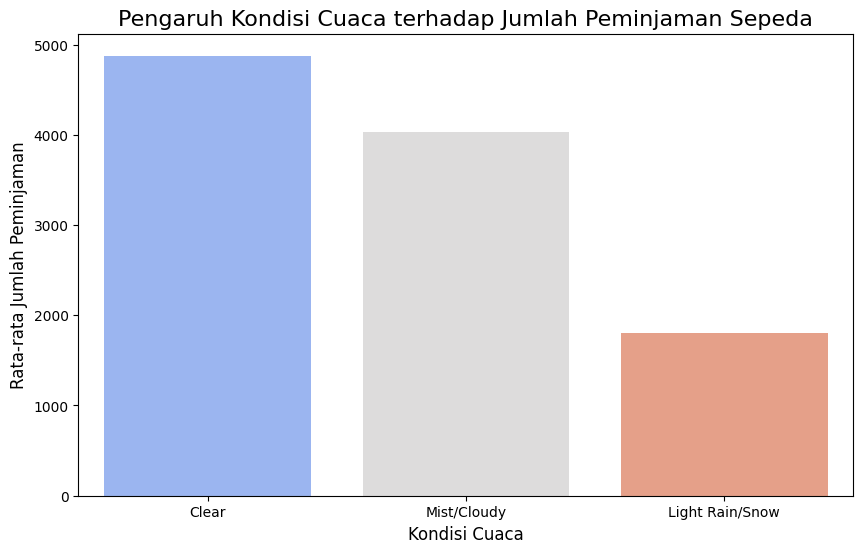

In [76]:
weather_rentals = day_data.groupby('weathersit')['cnt'].mean().reset_index()
weather_conditions = {1: "Clear", 2: "Mist/Cloudy", 3: "Light Rain/Snow", 4: "Heavy Rain/Snow"}
weather_rentals['weathersit'] = weather_rentals['weathersit'].map(weather_conditions)

plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', data=weather_rentals, palette='coolwarm')
plt.title('Pengaruh Kondisi Cuaca terhadap Jumlah Peminjaman Sepeda', fontsize=16)
plt.xlabel('Kondisi Cuaca', fontsize=12)
plt.ylabel('Rata-rata Jumlah Peminjaman', fontsize=12)
plt.show()

### Pertanyaan 2: Kapan waktu yang paling banyak diminati untuk meminjam sepeda? Apakah hari kerja atau hari libur?

<ipython-input-77-cace74e49b1b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='workingday', y='cnt', data=day_data, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


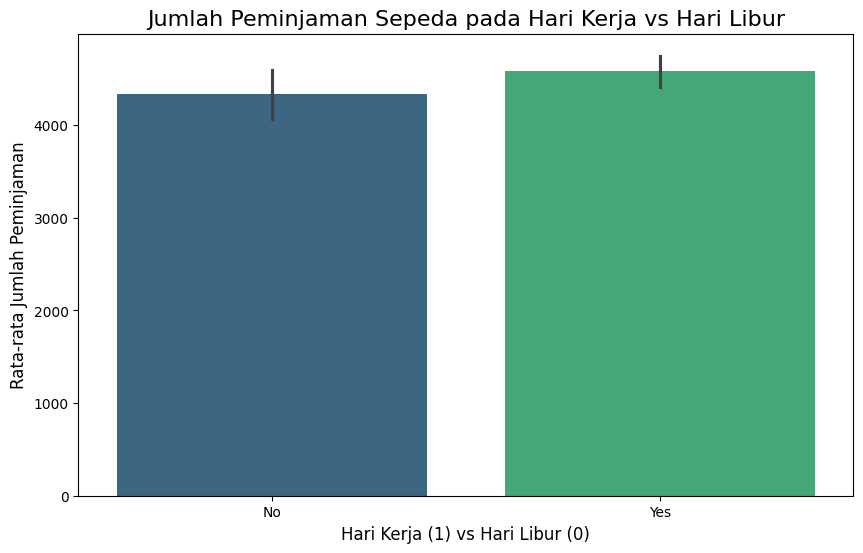

In [77]:
plt.figure(figsize=(10, 6))
sns.barplot(x='workingday', y='cnt', data=day_data, palette='viridis')
plt.title('Jumlah Peminjaman Sepeda pada Hari Kerja vs Hari Libur', fontsize=16)
plt.xlabel('Hari Kerja (1) vs Hari Libur (0)', fontsize=12)
plt.ylabel('Rata-rata Jumlah Peminjaman', fontsize=12)
plt.show()

**Insight:**
- Visualisasi pengaruh cuaca terhadap jumlah peminjaman sepeda dengan membandingkan antara rata-rata peminjaman dengan kondisi cuaca
- Visualisasi jumlah peminjaman sepeda pada hari kerja vs hari libur dengan membandingkan rata-rata peminjaman dengan waktu peminjaman (hari kerja/hari libur)

## Analisis Lanjutan (Opsional)

## Conclusion

- Berdasarkan hasil visualisasi dari proses analisis data yang dilakukan, dapat disimpulkan bahwa kondisi cuaca sangat mempengaruhi perilaku masyarakat dalam memilih kendaraan khususnya dalam kasus peminjaman sepeda. Masyarakat paling sering menggunakan sepeda ketika cuaca sedang cerah dan sedikit berawan dan paling jarang menggunakan sepeda ketika cuaca sedang hujan atau salju.
- Berdasarkan hasil visualisasi dari proses analisis data yang dilakukan, dapat disimpulkan bahwa masyarakat cenderung lebih sering menggunakan sepeda saat hari kerja dimana sepeda digunakan sebagai alat transportasi untuk berangkat ke tempat pekerjaannya

In [78]:
merged_results.to_csv('combined_analysis_results.csv', index=False)